In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, plot_roc_curve, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('titanic.csv')
print("Titanic dataset retrieved")

Titanic dataset retrieved


In [3]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


#### Checking for Nulls
findings:
- there are no nulls

In [4]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

#### Data Preprocessing Part 1
- simply replacing Sex values with machine readable values (i.e. 0 and 1) to include them for data exploration
    - i did this to Sex but not Salutation as Gender only has 2 unique values, and therefore easier to analyze (Salutation has 17 unique values)

In [5]:
data.replace(to_replace={"female": 0, "male": 1}, inplace=True)
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
5,0,3,Mr. James Moran,1,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,1,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,1,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,0,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,0,14.0,1,0,30.0708


#### Checking Data Correlations
findings:
- no data is too highly correlated (i.e. highest correlation is -0.55)
- _Pclass_ is __negatively correlated__ to _Fare_:
    - the higher the Pclass, the lower the Fare, OR 
    - the higher the Fare, the lower the Pclass
    - _lower Pclass costed more (i.e. first class is more expensive than second class)_
- _Pclass_ is __negatively correlated__ to _Survived_:
    - the higher the Pclass, the lower the survival rate, OR
    - the lower the Pclass, the higher the survival rate
    - _those in the lower Pclass had higher chances of surviving (possibly prioritising evacuation of passengers based on Pclass)_
- _Pclass_ is __negatively correlated__ to _Age_:
    - the higher the Pclass, the lower the Age, OR
    - the higher the Age, the lower the Pclass
    - _older passengers may have more money, thus paying for lower Pclass_
- _Parents/Children Aboard_ is __positively correlated__ to _Siblings/Spouses Aboard_:
    - the higher the Parents/Children Aboard, the higher the Siblings/Spouses Aboard, OR 
    - vice versa
    - _passengers who brought their parents/siblings along also brought their siblings/spouses together (family retreat)_
- _Sex_ is __negatively correlated__ to _Survived_:
    - the higher the Sex, the lower the survival rate, OR
    - the lower the Sex, the higher the survival rate
    - _as the values for Sex are either 0 (female), or 1 (male), this correlation shows that females are more likely to survive_

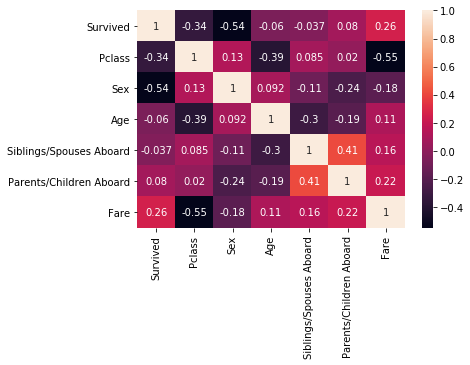

In [6]:
sns.heatmap(data.corr(), annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


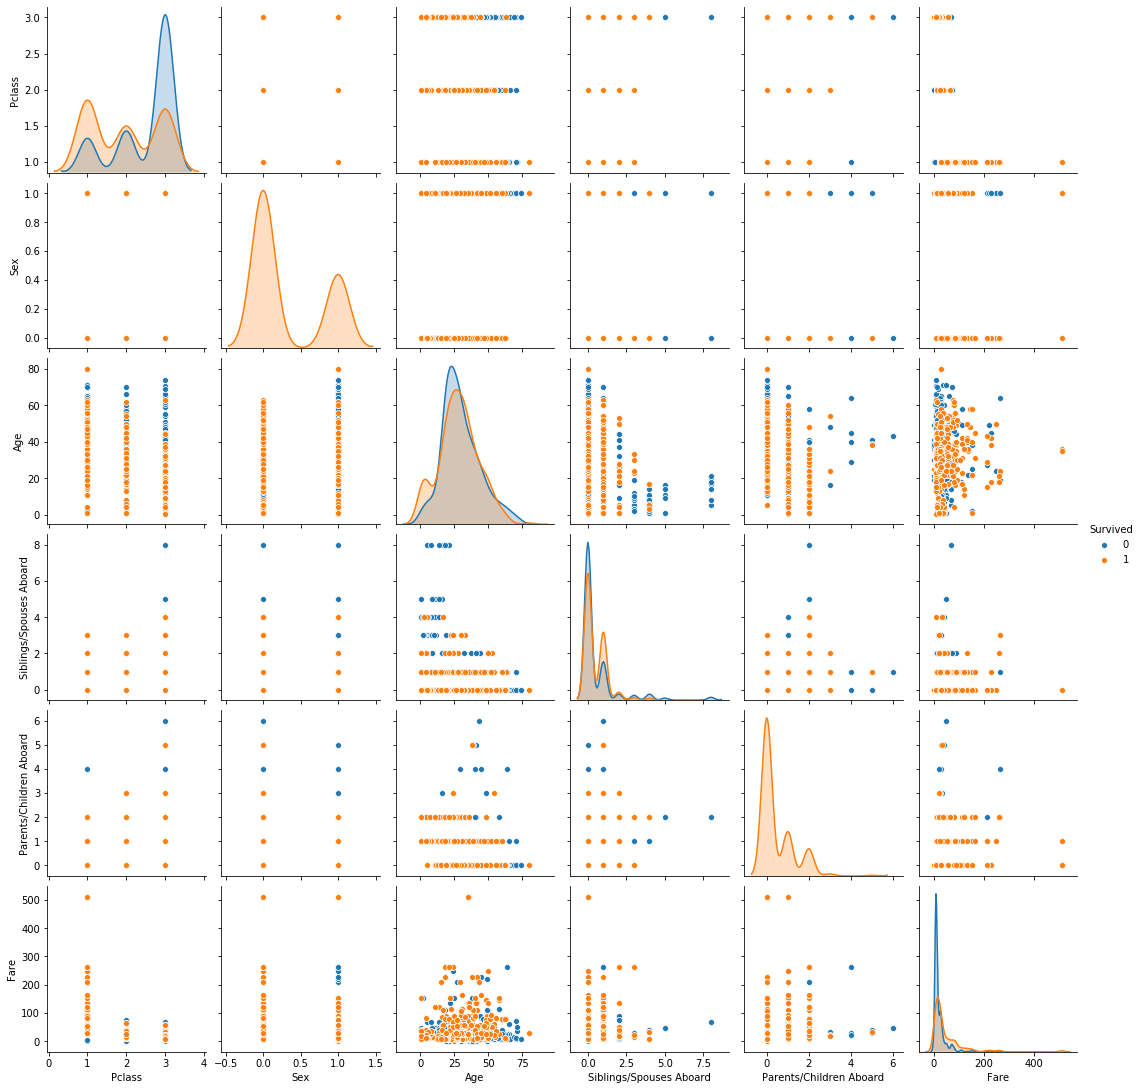

In [7]:
sns.pairplot(data, hue="Survived")
plt.show()

#### Data Preprocessing Part 2
- one hot encoding Salutations so that ML model can perform better

In [8]:
data['Salutation'] = data['Name'].str.split(' ').str[0]
data.drop("Name", axis=1, inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Salutation
0,0,3,1,22.0,1,0,7.2500,Mr.
1,1,1,0,38.0,1,0,71.2833,Mrs.
2,1,3,0,26.0,0,0,7.9250,Miss.
3,1,1,0,35.0,1,0,53.1000,Mrs.
4,0,3,1,35.0,0,0,8.0500,Mr.
5,0,3,1,27.0,0,0,8.4583,Mr.
6,0,1,1,54.0,0,0,51.8625,Mr.
7,0,3,1,2.0,3,1,21.0750,Master.
8,1,3,0,27.0,0,2,11.1333,Mrs.
9,1,2,0,14.0,1,0,30.0708,Mrs.


In [9]:
data = pd.concat([data, pd.get_dummies(data.Salutation, prefix="Salutation")], axis=1)
data.drop("Salutation", axis=1, inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Salutation_Capt.,Salutation_Col.,Salutation_Don.,...,Salutation_Master.,Salutation_Miss.,Salutation_Mlle.,Salutation_Mme.,Salutation_Mr.,Salutation_Mrs.,Salutation_Ms.,Salutation_Rev.,Salutation_Sir.,Salutation_the
0,0,3,1,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,3,1,27.0,0,0,8.4583,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,1,54.0,0,0,51.8625,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,3,1,2.0,3,1,21.0750,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,1,3,0,27.0,0,2,11.1333,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,2,0,14.0,1,0,30.0708,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Splitting Data

In [10]:
X = data.drop("Survived", axis=1)
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Scaling Data/Features
note:
- scale features ONLY
- feature scaling allows equal weight/contribution for each feature

In [11]:
scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression (~83% Accuracy)

In [12]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

print("Getting accuracy scores...")
lr_acc = accuracy_score(y_test, lr_pred)
print(f'\n Logistic Regression Accuracy = {round(100*lr_acc, 2)}%')

Getting accuracy scores...

 Logistic Regression Accuracy = 83.15%


#### Decision Tree (~80% Accuracy)

In [13]:
dt = DecisionTreeClassifier()

print("Training model...")
dt.fit(X_train_scaled, y_train)

print("Getting predictions...")
dt_pred = dt.predict(X_test_scaled)

print("Getting accuracy scores...")
dt_acc = accuracy_score(y_test, dt_pred)
print(f'\n Logistic Regression Accuracy = {round(100*dt_acc, 2)}%')

Training model...
Getting predictions...
Getting accuracy scores...

 Logistic Regression Accuracy = 80.34%


#### Random Forest (~85% Accuracy)

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)

print("Getting accuracy scores...")
rf_acc = accuracy_score(y_test, rf_pred)
print(f'\n Random Forest Accuracy = {round(100*rf_acc, 2)}%')

Getting accuracy scores...

 Random Forest Accuracy = 83.71%


#### Random Forest With GridSearchCV (% Accuracy)

In [15]:
# pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]# Create the random grid
# random_grid = {'randomforestclassifier__n_estimators': n_estimators,
#                'randomforestclassifier__max_features': max_features,
#                'randomforestclassifier__max_depth': max_depth,
#                'randomforestclassifier__min_samples_split': min_samples_split,
#                'randomforestclassifier__min_samples_leaf': min_samples_leaf,
#                'randomforestclassifier__bootstrap': bootstrap}


# rfr = GridSearchCV(pipeline, random_grid, cv=10)

# print("Training model...")
# rfr.fit(X_train_scaled, y_train)

# print("Getting predictions...")
# # test
# rfr_pred = rfr.predict(X_test_scaled)

# print("Getting accuracy scores...")
# rfr_acc = accuracy_score(y_test, rfr_pred)
# print(f'\n Logistic Regression Accuracy = {round(100*rfr_acc, 2)}%')

#### Random Forest With RandomSearchCV (% Accuracy)

In [16]:
# pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]# Create the random grid
# random_grid = {'randomforestclassifier__n_estimators': n_estimators,
#                'randomforestclassifier__max_features': max_features,
#                'randomforestclassifier__max_depth': max_depth,
#                'randomforestclassifier__min_samples_split': min_samples_split,
#                'randomforestclassifier__min_samples_leaf': min_samples_leaf,
#                'randomforestclassifier__bootstrap': bootstrap}

# rfg = RandomizedSearchCV(pipeline, random_grid, cv=10)

# print("Training model...")
# rfg.fit(X_train_scaled, y_train)

# print("Getting predictions...")
# # test
# rfg_pred = rfg.predict(X_test_scaled)

# print("Getting accuracy scores...")
# rfg_acc = accuracy_score(y_test, rfg_pred)
# print(f'\n Logistic Regression Accuracy = {round(100*rfg_acc, 2)}%')

#### Results Analysis - Confusion Matrix

In [22]:
print("Logistic Regression Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, lr_pred, labels=[1, 0]),index=[1, 0], columns=[1, 0]))

print("\nDecision Tree Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, dt_pred, labels=[1, 0]),index=[1, 0], columns=[1, 0]))

print("\nRandom Forest Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, rf_pred, labels=[1, 0]),index=[1, 0], columns=[1, 0]))

# print("\nRandom Forest GridSearchCV Confusion Matrix:")
# print(pd.DataFrame(confusion_matrix(y_test, rfg_pred, labels=[1, 0]),index=[1, 0], columns=[1, 0]))

# print("\nRandom Forest RandomSearchCV Confusion Matrix:")
# print(pd.DataFrame(confusion_matrix(y_test, rfr_pred, labels=[1, 0]),index=[1, 0], columns=[1, 0]))

Logistic Regression Confusion Matrix:
    1    0
1  44   19
0  11  104

Decision Tree Confusion Matrix:
    1    0
1  41   22
0  13  102

Random Forest Confusion Matrix:
    1    0
1  45   18
0  11  104


#### Results Analysis - ROC/AUC
- ROC: probability curve
- AUC: seperability curve

findings:
- Logistic Regression model seems decent at being able to distinguish whether passengers survived
- Decision Tree model is unable to distinguish whether passengers survived at all
- Random Forest model is a slight improvement from Decision Tree, but still worse than Logistic Regression

[reference](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

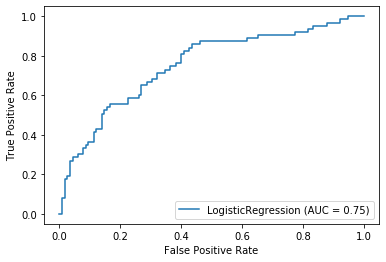

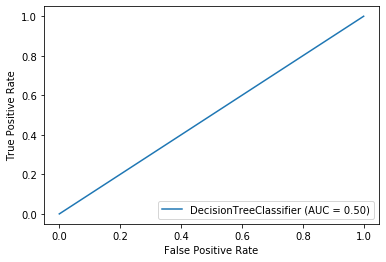

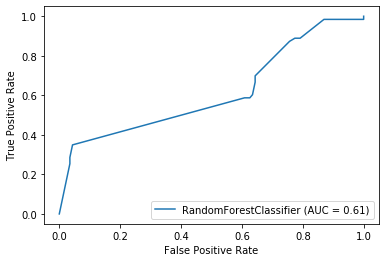

In [20]:
plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test)
plot_roc_curve(rf, X_test, y_test)
# plot_roc_curve(rfg, X_test, y_test)
# plot_roc_curve(rfr, X_test, y_test)
plt.show()